In [1]:
# Whether regulatory authorities publish published reports on water quality/drinking water delivery
# https://glaas.who.int/glaas/data?aW5kPVJFR0FfUkVQVFdRJTJDUkVHQV9SRVBUREVMSVYmdGltZT0yMDIxJmFwcGx5PXRydWU=

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel("glaas.xlsx", sheet_name="Raw data")

# Just to be sure - check columns
print(df.columns)

Index(['Ind', 'Indicator', 'ISO3', 'Countries, territories and areas', 'Year',
       'Service_code', 'Service', 'Setting_code', 'Setting', 'Value (text)',
       'Value (numerical)', 'Unit of measure'],
      dtype='object')


/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_90328/1927019439.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_counts.index, y=report_counts.values, palette="pastel")


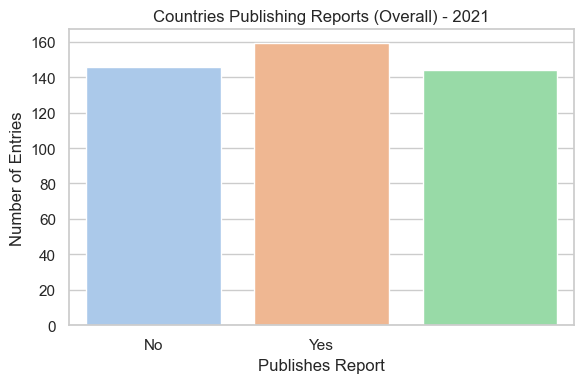

In [2]:
# Global Bar Chart: Publish vs Not Publish

# Count how many 1s (Yes) and 0s (No)
report_counts = df['Value (numerical)'].value_counts()

# Plot
# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x=report_counts.index, y=report_counts.values, palette="pastel")
plt.xticks([0,1], ['No', 'Yes'])
plt.title("Countries Publishing Reports (Overall) - 2021")
plt.ylabel("Number of Entries")
plt.xlabel("Publishes Report")
plt.tight_layout()
plt.show()

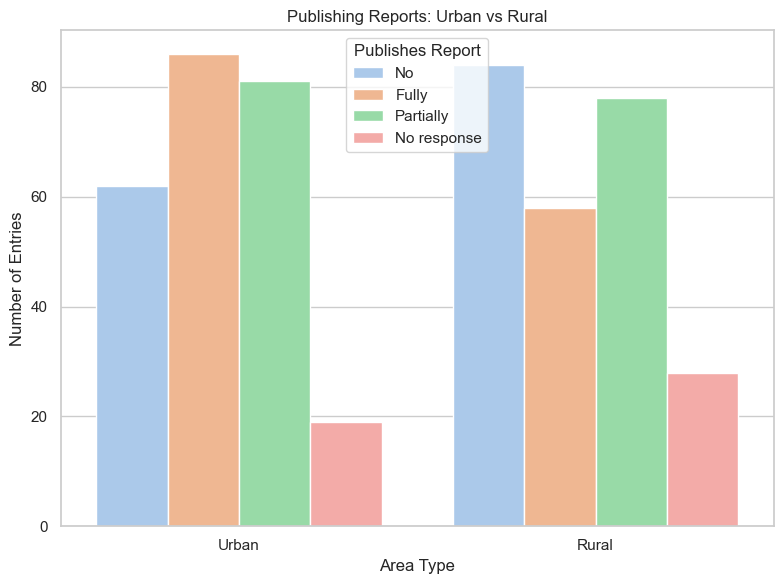

In [3]:
# Filter only Urban, Rural, National settings
filtered_df = df[df['Setting'].isin(['Urban', 'Rural', 'National'])]

# Now plot
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.countplot(data=filtered_df, x='Setting', hue='Value (text)', palette="pastel")
plt.title("Publishing Reports: Urban vs Rural")
plt.xlabel("Area Type")
plt.ylabel("Number of Entries")
plt.legend(title="Publishes Report", loc="upper center")
plt.tight_layout()
plt.show()


In [4]:
# Install plotly

!pip install plotly


In [5]:
import plotly.express as px

# Average publishing value per country
country_status = df.groupby('Countries, territories and areas')['Value (numerical)'].mean().reset_index()

# Plot
fig = px.choropleth(country_status,
                    locations="Countries, territories and areas",
                    locationmode="country names",
                    color="Value (numerical)",
                    color_continuous_scale=["red", "green"],
                    title="Global Transparency in Water Reporting")
fig.show()
fig.write_html("transparency_map.html", include_plotlyjs='cdn')


In [ ]:
# kip first 4 junk rows
df = pd.read_excel('glaas.xlsx', skiprows=4)

# remove spaces 
df.columns = df.columns.str.strip()

# Check columns
print(df.columns.tolist())

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Urban', 'Rural', 'Urban.1', 'Rural.1']


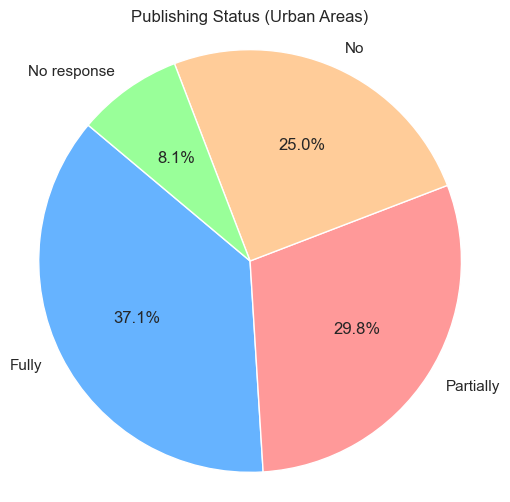

In [38]:
# Use the first 'Urban' column
publish_counts = df['Urban'].value_counts()

# labels and sizes
labels = publish_counts.index.tolist()
sizes = publish_counts.values.tolist()

# colors
colors = ['#66b3ff', '#ff9999', '#ffcc99', '#99ff99']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140
)
plt.axis('equal')
plt.title('Publishing Status (Urban Areas)')
plt.show()
